Mounted at /content/drive
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
Layer: block1_conv1, Feature map shape: (1, 224, 224, 64)


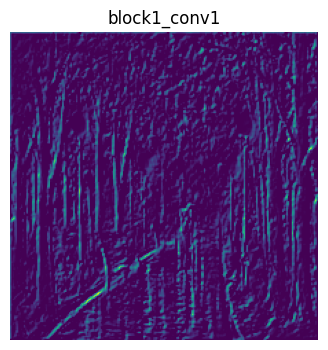

Layer: block1_conv2, Feature map shape: (1, 224, 224, 64)


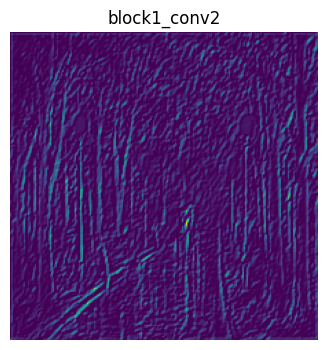

Layer: block2_conv1, Feature map shape: (1, 112, 112, 128)


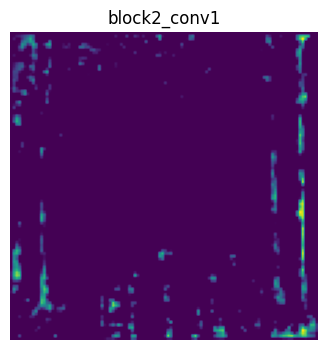

Layer: block2_conv2, Feature map shape: (1, 112, 112, 128)


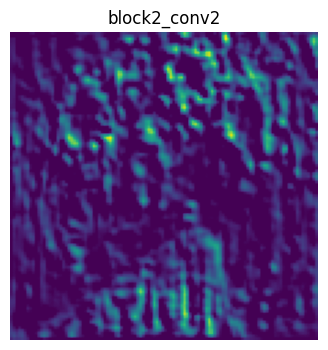

Layer: block3_conv1, Feature map shape: (1, 56, 56, 256)


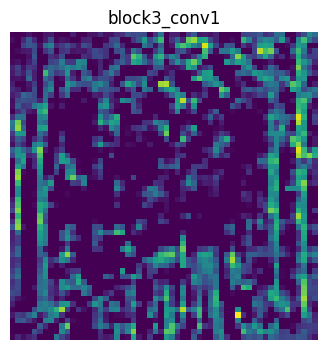

Layer: block3_conv2, Feature map shape: (1, 56, 56, 256)


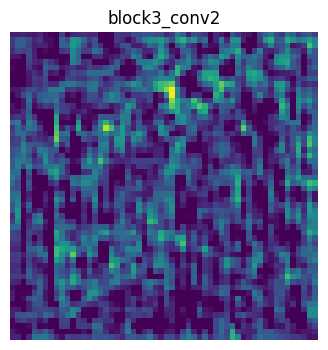

Layer: block3_conv3, Feature map shape: (1, 56, 56, 256)


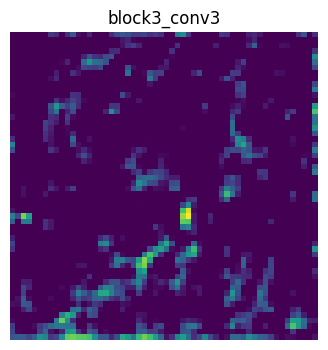

Layer: block4_conv1, Feature map shape: (1, 28, 28, 512)


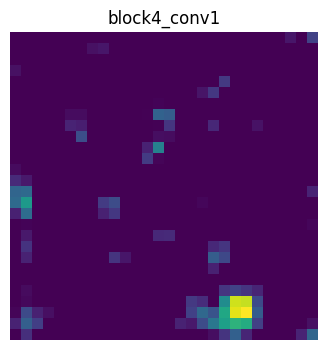

Layer: block4_conv2, Feature map shape: (1, 28, 28, 512)


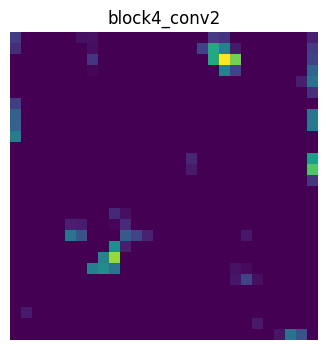

Layer: block4_conv3, Feature map shape: (1, 28, 28, 512)


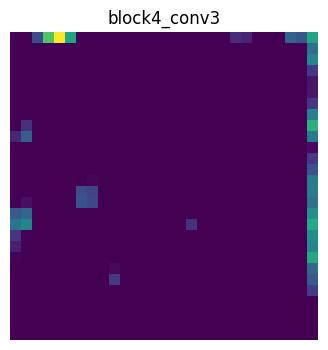

Layer: block5_conv1, Feature map shape: (1, 14, 14, 512)


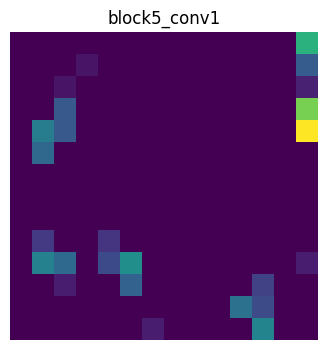

Layer: block5_conv2, Feature map shape: (1, 14, 14, 512)


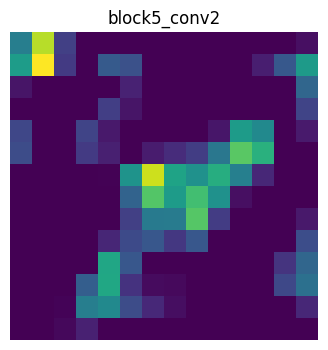

Layer: block5_conv3, Feature map shape: (1, 14, 14, 512)


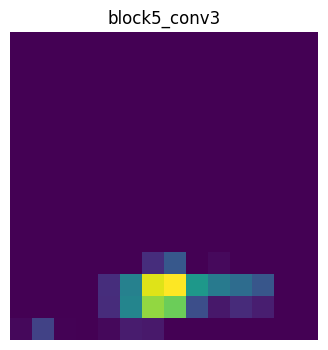

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Load the image and preprocess
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # VGG models expect 224x224 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Load the VGG model
model = VGG16(weights='imagenet', include_top=False)

# List all the convolutional layers
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

# Define a model that outputs features from all convolutional layers
outputs = [model.get_layer(name).output for name in layer_names]
feature_extraction_model = tf.keras.Model(inputs=model.input, outputs=outputs)

# Path to your image
img_path = '/content/drive/My Drive/Colab Notebooks/projects/artistic_style_transfer/style_image-1.jpg'  # Update with your image path in Colab
img = load_and_preprocess_image(img_path)


# Extract features
features = feature_extraction_model.predict(img)

# Display features for each layer
for layer_name, feature_map in zip(layer_names, features):
    print(f"Layer: {layer_name}, Feature map shape: {feature_map.shape}")
    # Visualize the first filter's activation for simplicity
    plt.figure(figsize=(4, 4))
    plt.title(layer_name)
    plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
Layer: block1_conv1, Feature map shape: (1, 224, 224, 64)


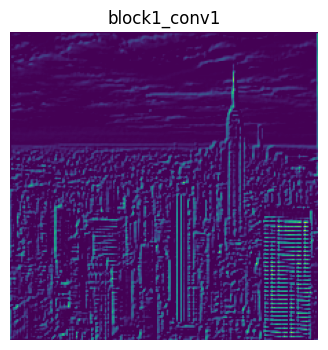

Layer: block1_conv2, Feature map shape: (1, 224, 224, 64)


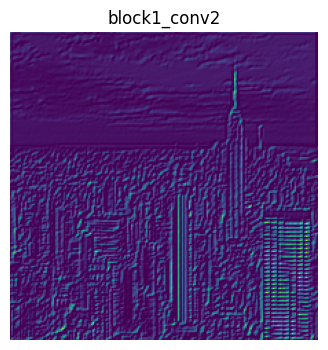

Layer: block2_conv1, Feature map shape: (1, 112, 112, 128)


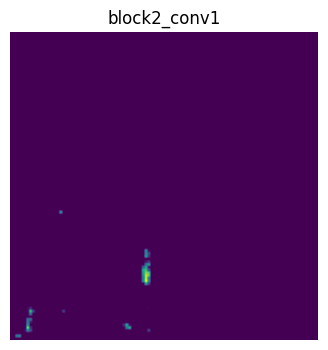

Layer: block2_conv2, Feature map shape: (1, 112, 112, 128)


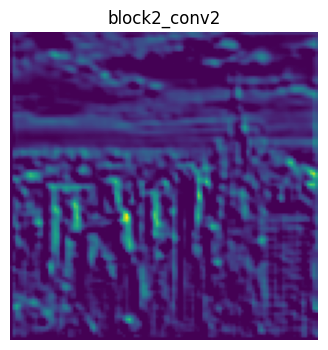

Layer: block3_conv1, Feature map shape: (1, 56, 56, 256)


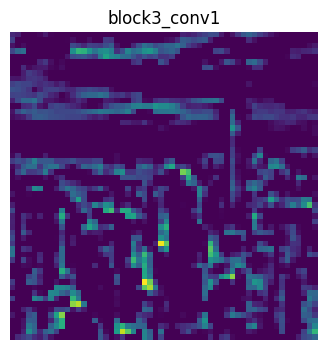

Layer: block3_conv2, Feature map shape: (1, 56, 56, 256)


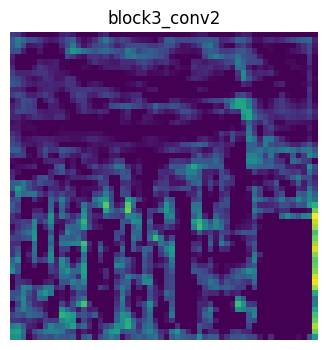

Layer: block3_conv3, Feature map shape: (1, 56, 56, 256)


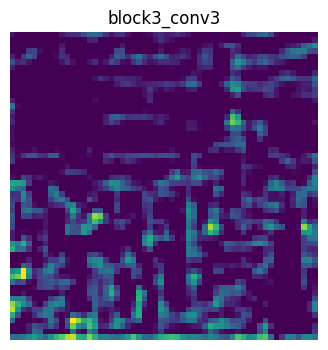

Layer: block4_conv1, Feature map shape: (1, 28, 28, 512)


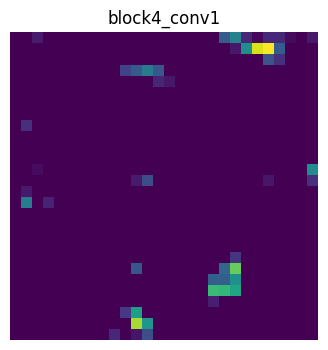

Layer: block4_conv2, Feature map shape: (1, 28, 28, 512)


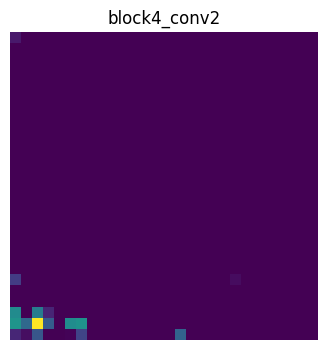

Layer: block4_conv3, Feature map shape: (1, 28, 28, 512)


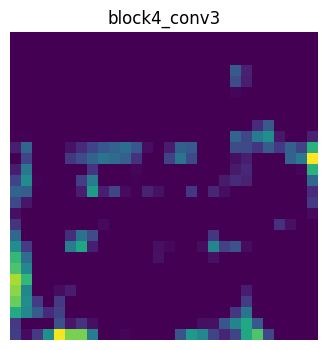

Layer: block5_conv1, Feature map shape: (1, 14, 14, 512)


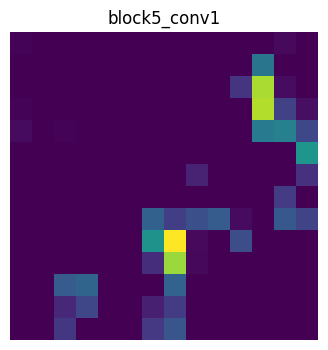

Layer: block5_conv2, Feature map shape: (1, 14, 14, 512)


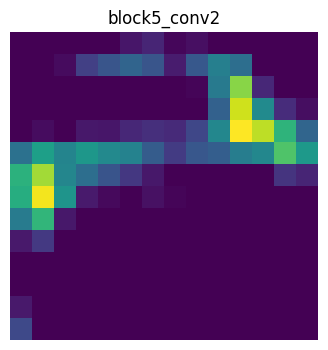

Layer: block5_conv3, Feature map shape: (1, 14, 14, 512)


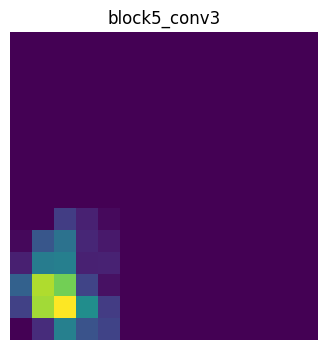

In [2]:
imge_path2 = '/content/drive/My Drive/Colab Notebooks/projects/artistic_style_transfer/content_image-1.jpg'
img2 = load_and_preprocess_image(imge_path2)

# Extract features
features2 = feature_extraction_model.predict(img2)

# Display features for each layer
for layer_name, feature_map in zip(layer_names, features2):
    print(f"Layer: {layer_name}, Feature map shape: {feature_map.shape}")
    # Visualize the first filter's activation for simplicity
    plt.figure(figsize=(4,4))
    plt.title(layer_name)
    plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
Layer: block1_conv1, Feature map shape: (1, 224, 224, 64)


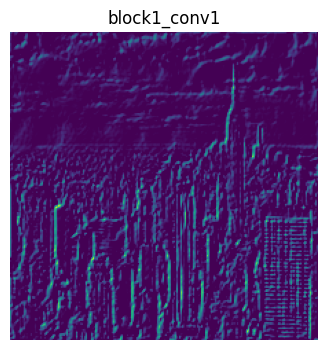

Layer: block1_conv2, Feature map shape: (1, 224, 224, 64)


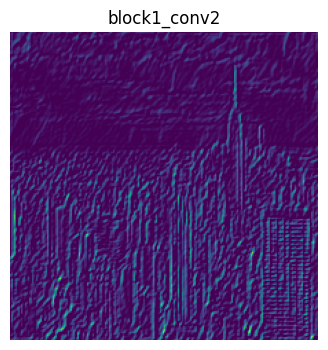

Layer: block2_conv1, Feature map shape: (1, 112, 112, 128)


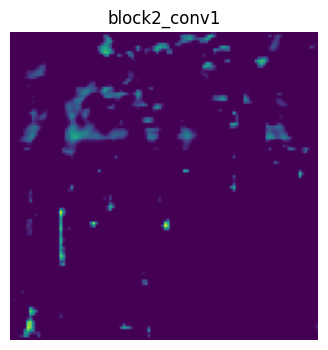

Layer: block2_conv2, Feature map shape: (1, 112, 112, 128)


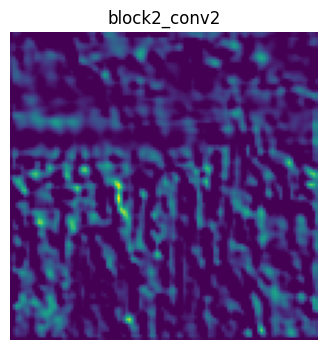

Layer: block3_conv1, Feature map shape: (1, 56, 56, 256)


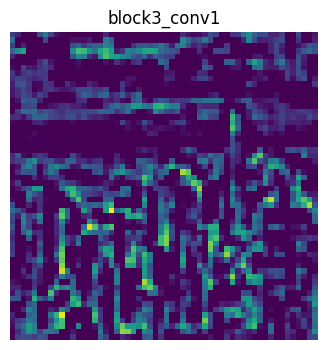

Layer: block3_conv2, Feature map shape: (1, 56, 56, 256)


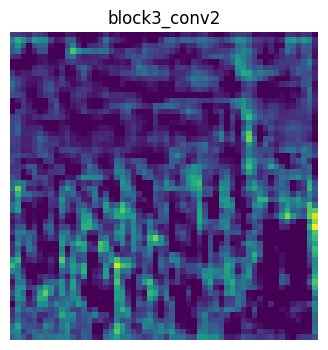

Layer: block3_conv3, Feature map shape: (1, 56, 56, 256)


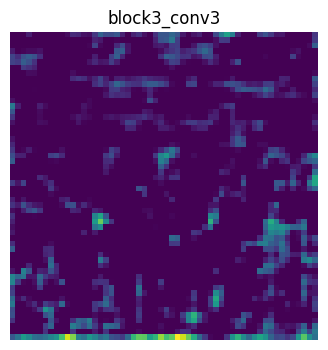

Layer: block4_conv1, Feature map shape: (1, 28, 28, 512)


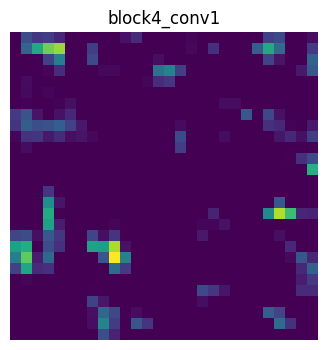

Layer: block4_conv2, Feature map shape: (1, 28, 28, 512)


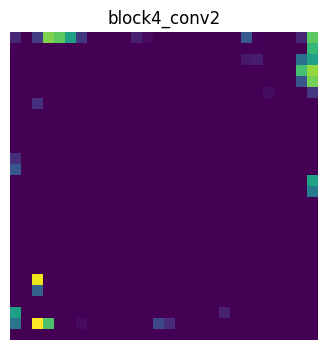

Layer: block4_conv3, Feature map shape: (1, 28, 28, 512)


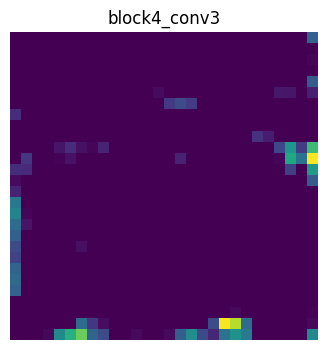

Layer: block5_conv1, Feature map shape: (1, 14, 14, 512)


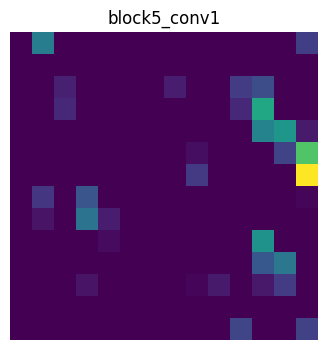

Layer: block5_conv2, Feature map shape: (1, 14, 14, 512)


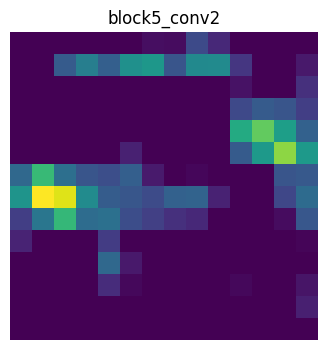

Layer: block5_conv3, Feature map shape: (1, 14, 14, 512)


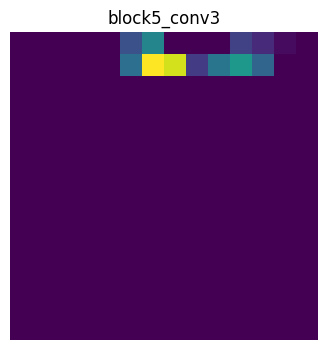

In [3]:
imge_path3 = '/content/drive/My Drive/Colab Notebooks/projects/artistic_style_transfer/result-1.png'
img3 = load_and_preprocess_image(imge_path3)

# Extract features
features3 = feature_extraction_model.predict(img3)

# Display features for each layer
for layer_name, feature_map in zip(layer_names, features3):
    print(f"Layer: {layer_name}, Feature map shape: {feature_map.shape}")
    # Visualize the first filter's activation for simplicity
    plt.figure(figsize=(4,4))
    plt.title(layer_name)
    plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
Layer: block1_conv1, Feature map shape: (1, 224, 224, 64)


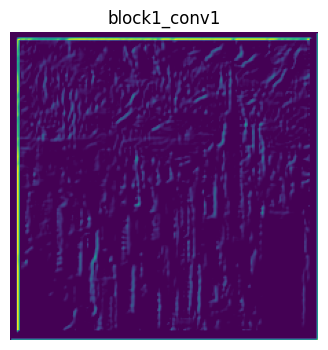

Layer: block1_conv2, Feature map shape: (1, 224, 224, 64)


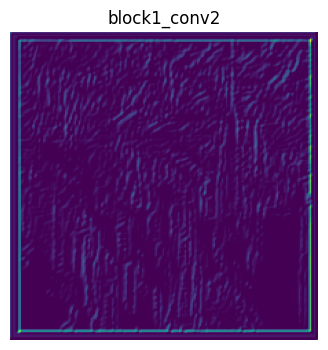

Layer: block2_conv1, Feature map shape: (1, 112, 112, 128)


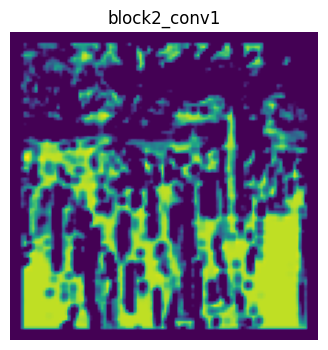

Layer: block2_conv2, Feature map shape: (1, 112, 112, 128)


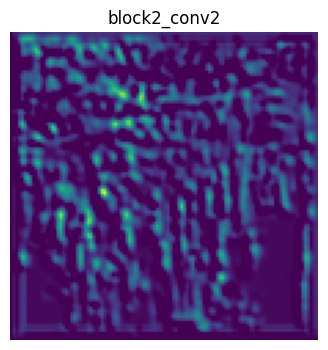

Layer: block3_conv1, Feature map shape: (1, 56, 56, 256)


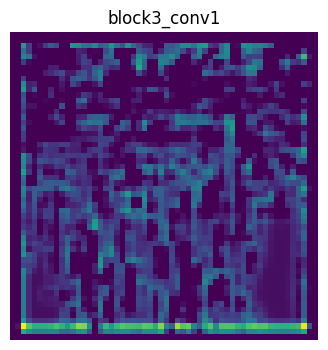

Layer: block3_conv2, Feature map shape: (1, 56, 56, 256)


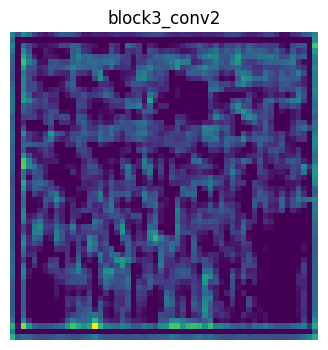

Layer: block3_conv3, Feature map shape: (1, 56, 56, 256)


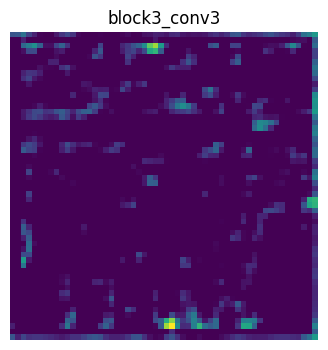

Layer: block4_conv1, Feature map shape: (1, 28, 28, 512)


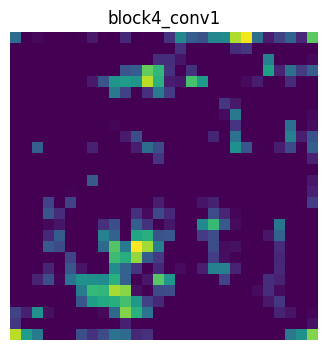

Layer: block4_conv2, Feature map shape: (1, 28, 28, 512)


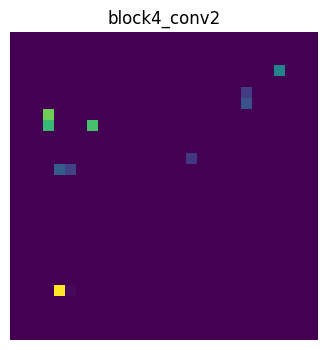

Layer: block4_conv3, Feature map shape: (1, 28, 28, 512)


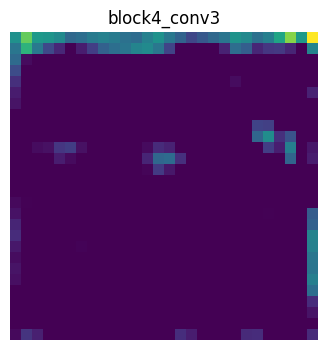

Layer: block5_conv1, Feature map shape: (1, 14, 14, 512)


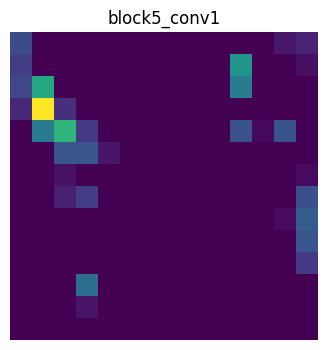

Layer: block5_conv2, Feature map shape: (1, 14, 14, 512)


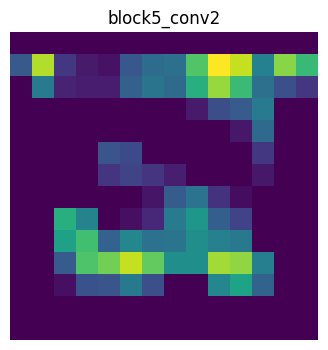

Layer: block5_conv3, Feature map shape: (1, 14, 14, 512)


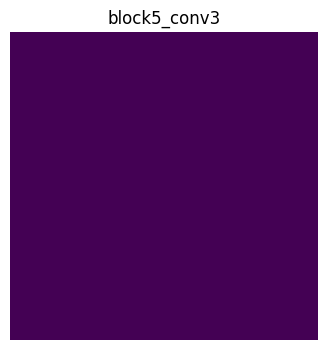

In [4]:
imge_path4 = '/content/drive/My Drive/Colab Notebooks/projects/artistic_style_transfer/my-result-1.png'
img4 = load_and_preprocess_image(imge_path4)

# Extract features
features4 = feature_extraction_model.predict(img4)

# Display features for each layer
for layer_name, feature_map in zip(layer_names, features4):
    print(f"Layer: {layer_name}, Feature map shape: {feature_map.shape}")
    # Visualize the first filter's activation for simplicity
    plt.figure(figsize=(4,4))
    plt.title(layer_name)
    plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
Layer: block1_conv1, Feature map shape: (1, 224, 224, 64)


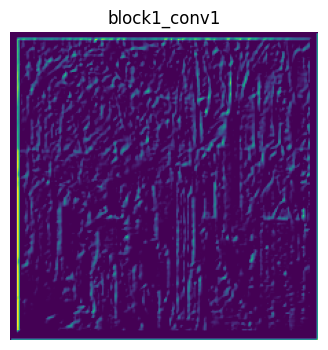

Layer: block1_conv2, Feature map shape: (1, 224, 224, 64)


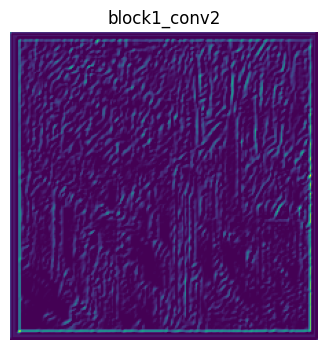

Layer: block2_conv1, Feature map shape: (1, 112, 112, 128)


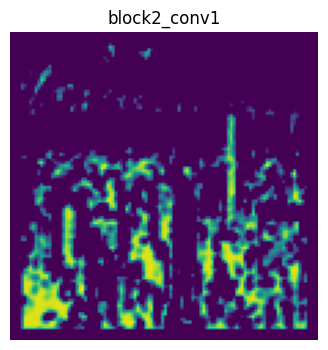

Layer: block2_conv2, Feature map shape: (1, 112, 112, 128)


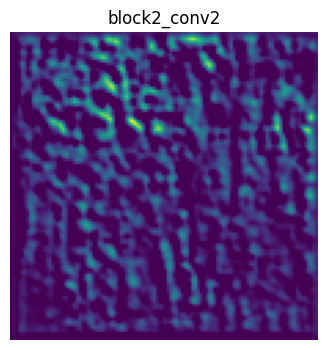

Layer: block3_conv1, Feature map shape: (1, 56, 56, 256)


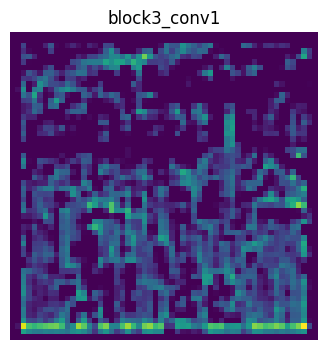

Layer: block3_conv2, Feature map shape: (1, 56, 56, 256)


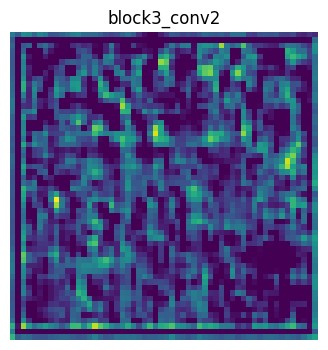

Layer: block3_conv3, Feature map shape: (1, 56, 56, 256)


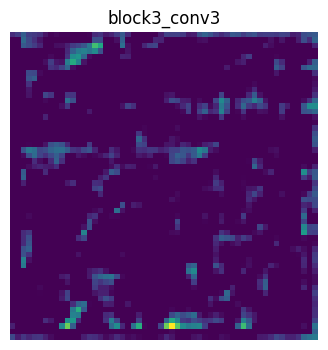

Layer: block4_conv1, Feature map shape: (1, 28, 28, 512)


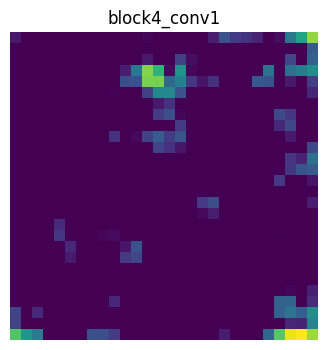

Layer: block4_conv2, Feature map shape: (1, 28, 28, 512)


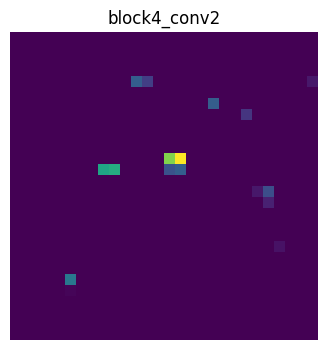

Layer: block4_conv3, Feature map shape: (1, 28, 28, 512)


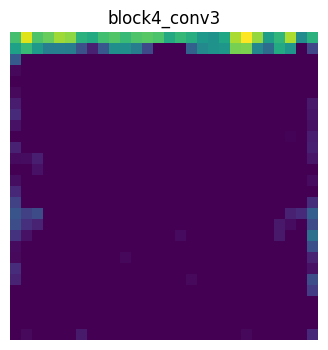

Layer: block5_conv1, Feature map shape: (1, 14, 14, 512)


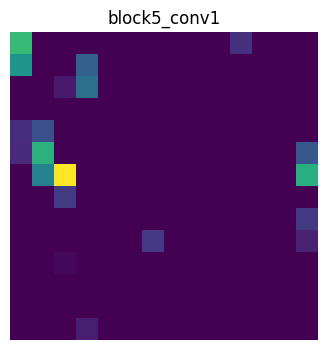

Layer: block5_conv2, Feature map shape: (1, 14, 14, 512)


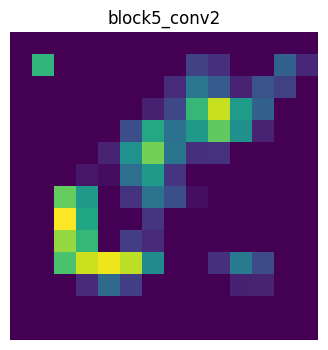

Layer: block5_conv3, Feature map shape: (1, 14, 14, 512)


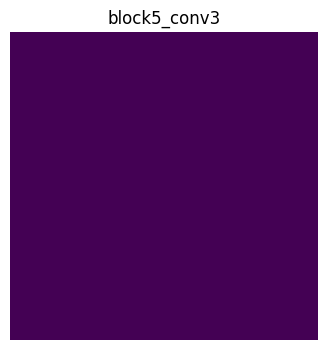

In [5]:
imge_path5 = '/content/drive/My Drive/Colab Notebooks/projects/artistic_style_transfer/my-result-vgg19.png'
img5 = load_and_preprocess_image(imge_path5)

# Extract features
features5 = feature_extraction_model.predict(img5)

# Display features for each layer
for layer_name, feature_map in zip(layer_names, features5):
    print(f"Layer: {layer_name}, Feature map shape: {feature_map.shape}")
    # Visualize the first filter's activation for simplicity
    plt.figure(figsize=(4,4))
    plt.title(layer_name)
    plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
    plt.axis('off')
    plt.show()